<a href="https://colab.research.google.com/github/jpcosta90/datasciencecoursera/blob/master/Trabalho_Reg_Linear_logX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRABALHO FINAL - ANÁLISE DE DADOS**

Em um estudo deseja-se analisar aspectos relacionados com o preço de venda de casas em uma cidade americana. O objetivo é predizer o preço de venda de residências em função de características da casa e sua vizinhança.

O conjunto de dados no arquivo dados_trabalho.xlsx, em anexo, apresenta as seguintes informações sobre 11 características de 522 casas vendidas durante o último ano nesta cidade.



| Código | Nome                        | Descrição                                  |
|-------|----------------------------|--------------------------------------------|
| ID    | Número de Identificação     | 1-522                                      |
| x1    | Preço de venda              | Preço de venda da casa (em dólares)        |
| x2    | Tamanho da casa             | Área da casa (em pés quadrados)            |
| x3    | Número de quartos           | Número de quartos na casa                  |
| x4    | Número de banheiros         | Número de banheiros na casa                |
| x5    | Ar condicionado             | Presença de ar condicionado na casa        |
| x6    | Tamanho da garagem          | Número de carros que podem ser guardados   |
|       |                            | na garagem                                 |
| x7    | Piscina                    | Presença ou ausência de piscina            |
|       |                            | (1 – sim 0 – não)                          |
| x8    | Ano de construção           | Ano em que a casa foi originalmente        |
|       |                            | construída                                 |
| x9    | Qualidade da construção     | Índice de qualidade da construção:         |
|       |                            | 1. Alta qualidade                         |
|       |                            | 2. Média qualidade                        |
|       |                            | 3. Baixa qualidade                        |
| x10   | Tamanho do terreno          | Tamanho do terreno (em pés quadrados)      |
| x11   | Proximidade da “highway"    | Proximidade de “highway" (1 – sim 0 – não) |

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/DADOS_TRABALHO_2023_1_af1ab3af385c6daaec7c784896557598.xlsx')

In [3]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11'],
      dtype='object')

In [4]:
# Criando a coluna "Idade da Casa"
df['X12'] = 2023 - df['X8']

In [5]:
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,360000,3032,4,4,1,2,0,1972,2,22221,0,51
1,2,340000,2058,4,2,1,2,0,1976,2,22912,0,47
2,3,250000,1780,4,3,1,2,0,1980,2,21345,0,43
3,4,205500,1638,4,2,1,2,0,1963,2,17342,0,60
4,5,275500,2196,4,3,1,2,0,1968,2,21786,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,137000,1655,2,1,0,1,0,1935,3,54651,0,88
518,519,185000,1944,3,2,1,2,0,1939,3,17999,0,84
519,520,133500,1922,3,1,0,2,0,1950,3,14805,0,73
520,521,124000,1480,3,2,1,2,0,1953,3,28351,0,70


---
#### Veriricação de valores faltantes


In [6]:
# Verificando o tipo de dado de cada coluna, excluindo o ID
tipos_dados = df.drop('ID', axis=1).dtypes

# Exibindo o tipo de dado de cada coluna
print("Tipos de Dados:")
print(tipos_dados)
print()

Tipos de Dados:
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
dtype: object



In [7]:
import numpy as np
import pandas as pd

# Calcular o logaritmo natural da coluna X1 e atribuir a uma nova coluna chamada 'log_X1'
df['log_X1'] = np.log(df['X1'])

In [8]:
import pandas as pd

# Verificando a quantidade de valores nulos em cada coluna
valores_ausentes = df.isnull().sum()

# Exibindo a quantidade de valores nulos em cada coluna
print(valores_ausentes)

ID        0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
log_X1    0
dtype: int64


In [9]:
# Dicionário com as descrições das variáveis
descricao_variaveis = {
    "ID": "Número de Identificação",
    "X1": "Preço de venda (em dólares)",
    "X2": "Área da casa (em pés quadrados)",
    "X3": "Número de quartos na casa",
    "X4": "Número de banheiros na casa",
    "X5": "Presença de ar condicionado na casa",
    "X6": "Número de carros que podem ser guardados na garagem",
    "X7": "Presença ou ausência de piscina",
    "X8": "Ano de construção da casa",
    "X9": "Índice de qualidade da construção",
    "X10": "Tamanho do terreno (em pés quadrados)",
    "X11": "Proximidade de 'highway'",
    "X12": "Idade da Casa",
    "log_X1": "Log(Preço)"
}

Análise descritiva para a variável: Preço de venda (em dólares)
count       522.000000
mean     277894.147510
std      137923.397269
min       84000.000000
25%      180000.000000
50%      229900.000000
75%      335000.000000
max      920000.000000
Name: X1, dtype: float64



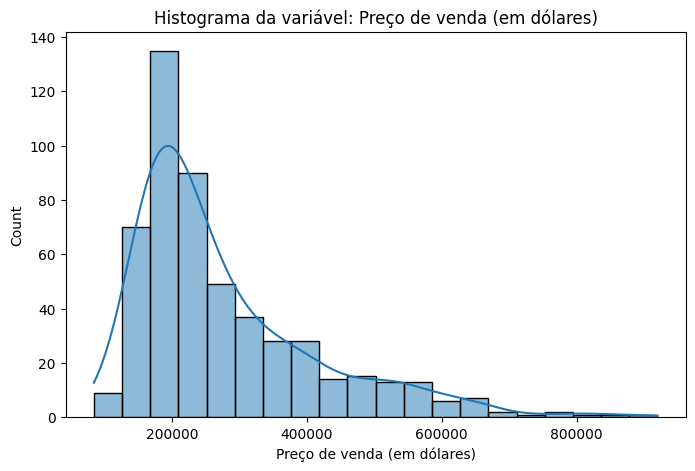

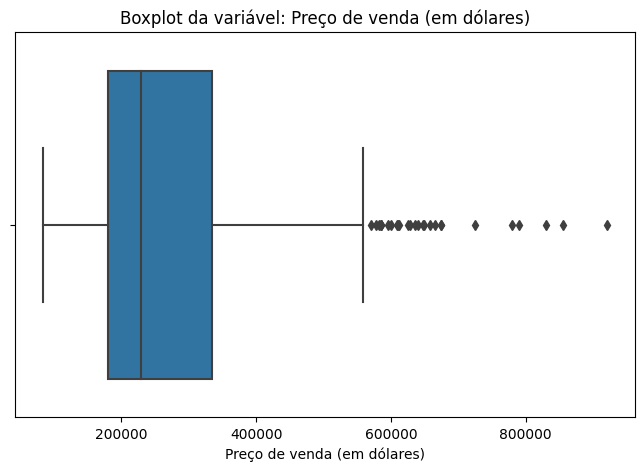

Análise descritiva para a variável: Área da casa (em pés quadrados)
count     522.000000
mean     2260.626437
std       711.065933
min       980.000000
25%      1701.250000
50%      2061.000000
75%      2636.250000
max      5032.000000
Name: X2, dtype: float64



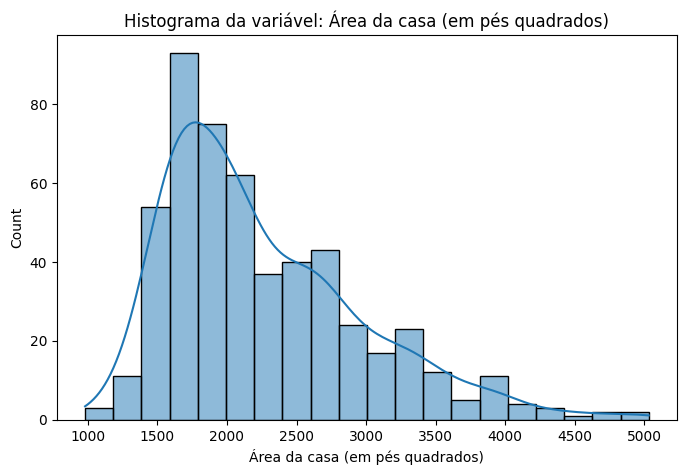

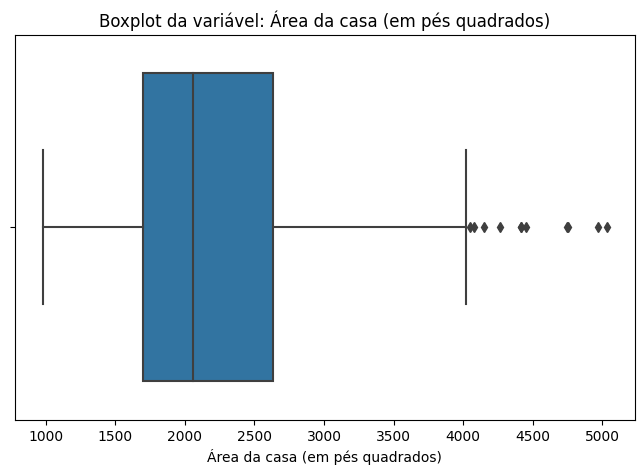

Análise descritiva para a variável: Tamanho do terreno (em pés quadrados)
count      522.000000
mean     24369.704981
std      11684.075549
min       4560.000000
25%      17204.750000
50%      22200.000000
75%      26786.750000
max      86830.000000
Name: X10, dtype: float64



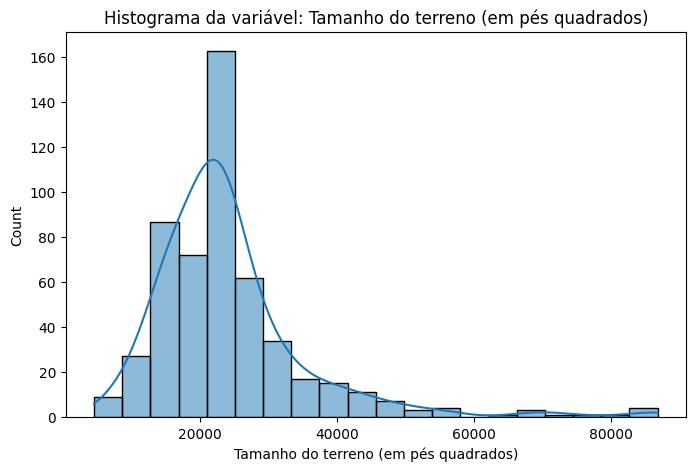

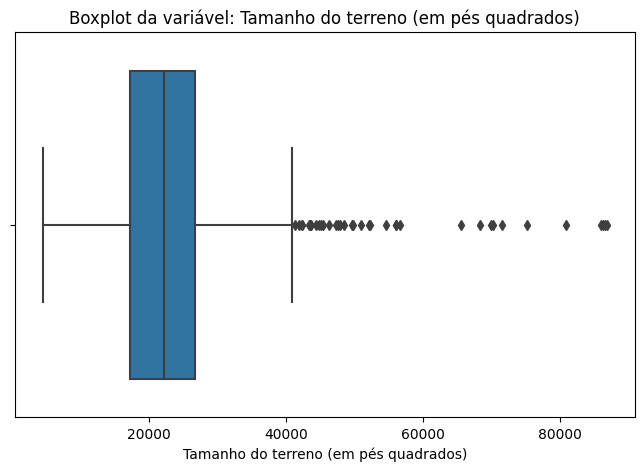

Análise descritiva para a variável: Idade da Casa
count    522.000000
mean      56.095785
std       17.637924
min       25.000000
25%       42.000000
50%       57.000000
75%       67.000000
max      138.000000
Name: X12, dtype: float64



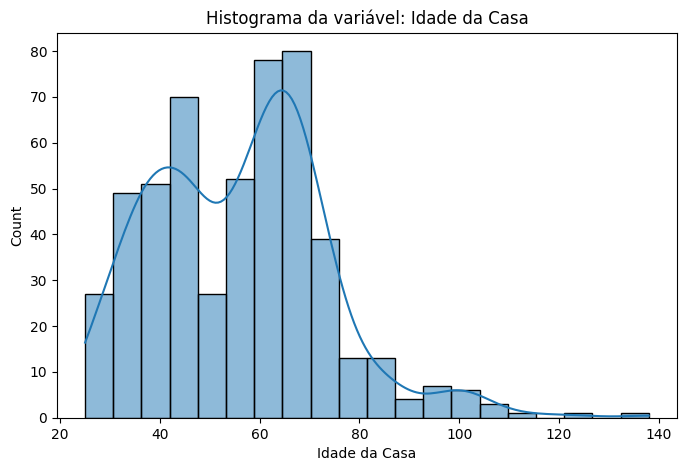

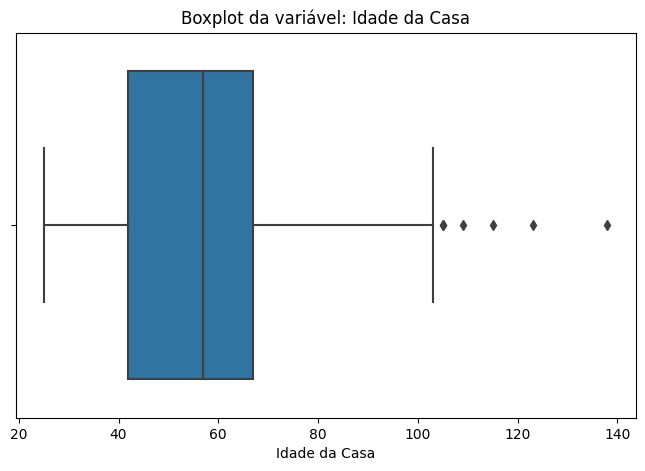

Análise descritiva para a variável: Log(Preço)
count    522.000000
mean      12.434625
std        0.431671
min       11.338572
25%       12.100712
50%       12.345400
75%       12.721886
max       13.732129
Name: log_X1, dtype: float64



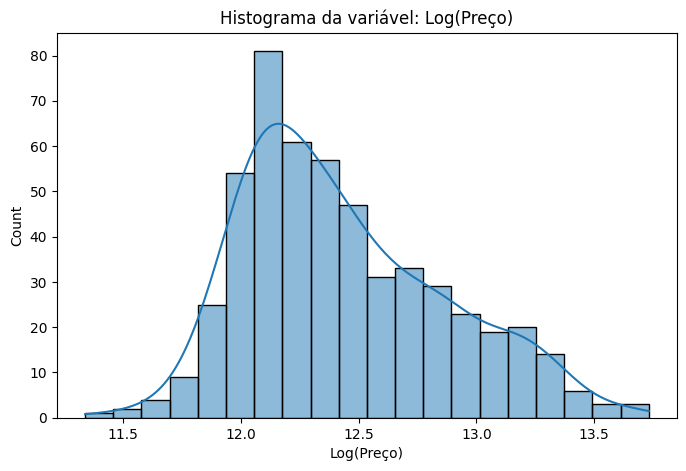

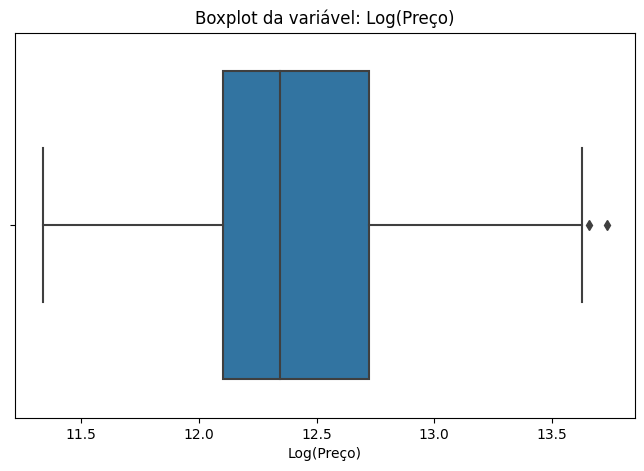

In [10]:
# Análise descritiva univariada para variáveis numéricas (exceto ID e as não discretas)
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for coluna in colunas_numericas:
    if coluna != 'ID' and coluna not in ['X3', 'X4', 'X6', 'X9', 'X5', 'X7', 'X11', 'X8']:  # Excluindo o ID e as não discretas da análise descritiva
        descricao_var = descricao_variaveis[coluna]
        print(f"Análise descritiva para a variável: {descricao_var}")
        print(df[coluna].describe())
        print()
        plt.figure(figsize=(8, 5))
        sns.histplot(df[coluna], kde=True, bins=20)
        plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
        plt.title(f"Histograma da variável: {descricao_var}")
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=coluna)
        plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
        plt.title(f"Boxplot da variável: {descricao_var}")
        plt.show()

Análise descritiva para a variável: Número de quartos na casa
3    202
4    179
2     64
5     52
6     12
1      9
7      3
0      1
Name: X3, dtype: int64


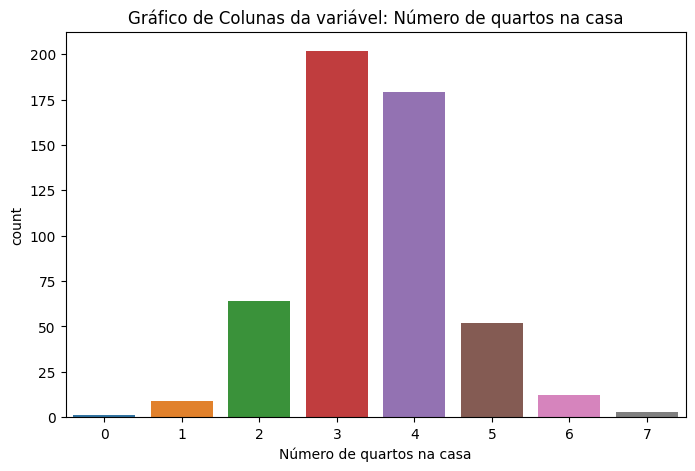

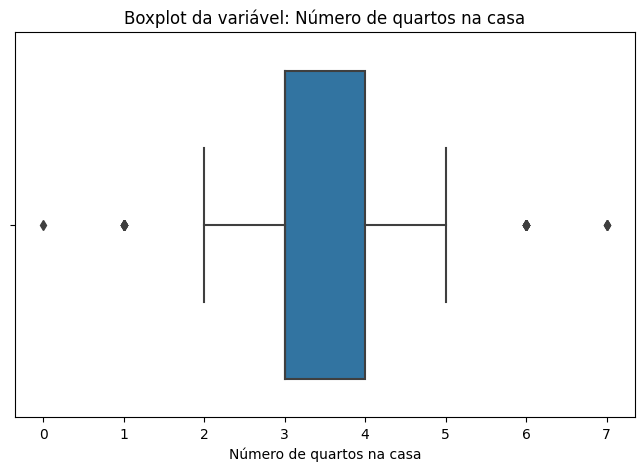

Análise descritiva para a variável: Número de banheiros na casa
3    175
2    171
4     84
1     71
5     17
7      2
6      1
0      1
Name: X4, dtype: int64


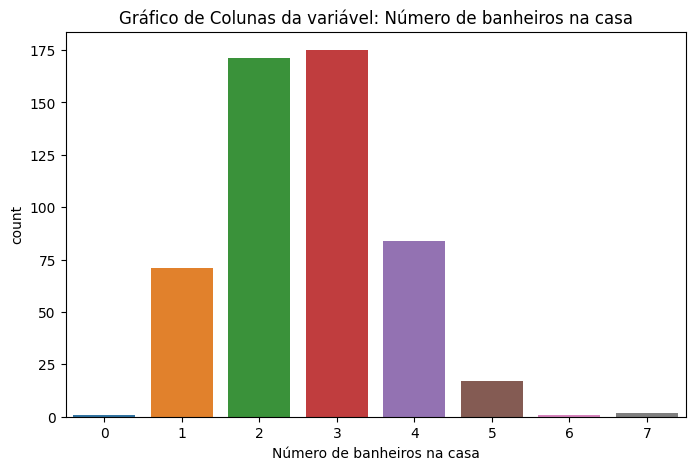

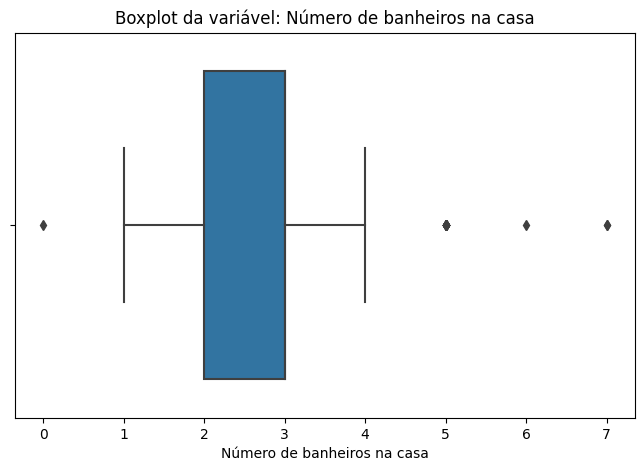

Análise descritiva para a variável: Número de carros que podem ser guardados na garagem
2    353
3    106
1     52
0      7
4      2
5      1
7      1
Name: X6, dtype: int64


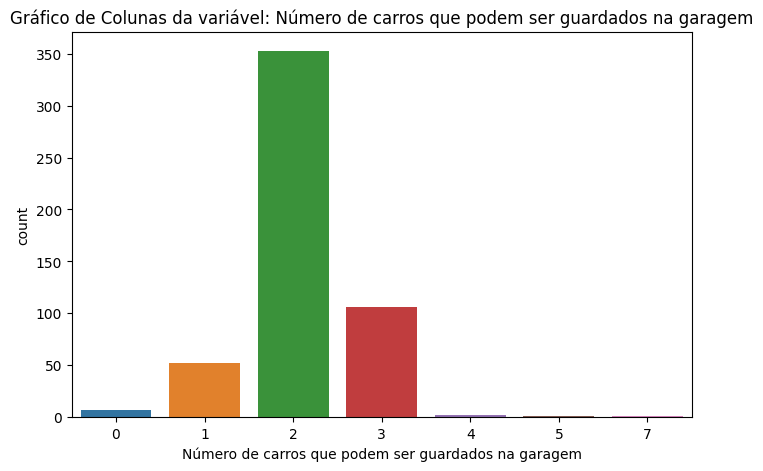

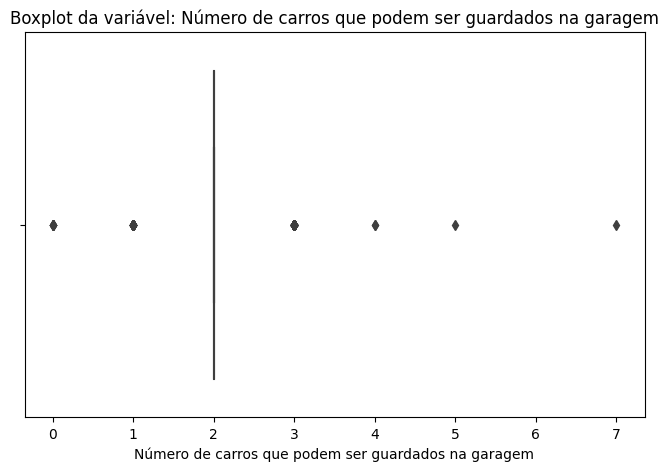

Análise descritiva para a variável: Índice de qualidade da construção
2    290
3    164
1     68
Name: X9, dtype: int64


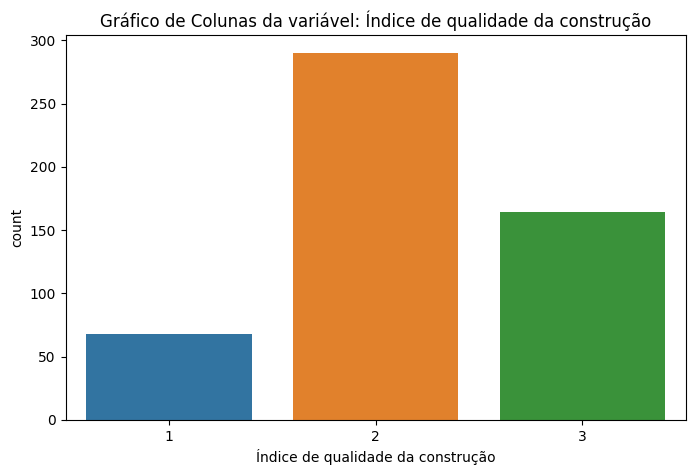

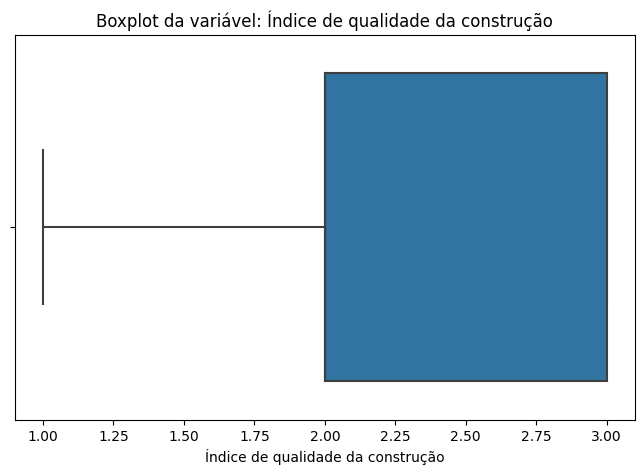

In [12]:
# Análise descritiva univariada para variáveis não discretas usando gráficos de barras
colunas_nao_discretas = ['X3', 'X4', 'X6', 'X9']

for coluna in colunas_nao_discretas:
    descricao_var = descricao_variaveis[coluna]
    print(f"Análise descritiva para a variável: {descricao_var}")
    print(df[coluna].value_counts())
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=coluna)
    plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
    plt.title(f"Gráfico de Colunas da variável: {descricao_var}")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=coluna)
    plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
    plt.title(f"Boxplot da variável: {descricao_var}")
    plt.show()

Análise descritiva para a variável: Presença de ar condicionado na casa
1    434
0     88
Name: X5, dtype: int64
Análise descritiva para a variável: Presença ou ausência de piscina
0    486
1     36
Name: X7, dtype: int64
Análise descritiva para a variável: Proximidade de 'highway'
0    511
1     11
Name: X11, dtype: int64


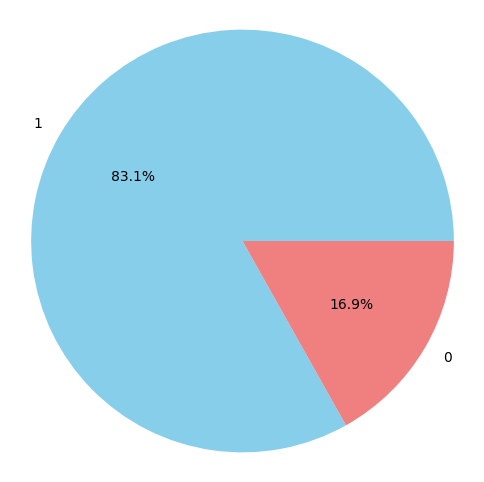

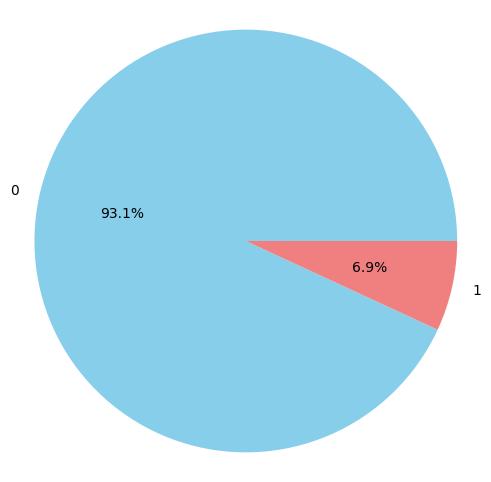

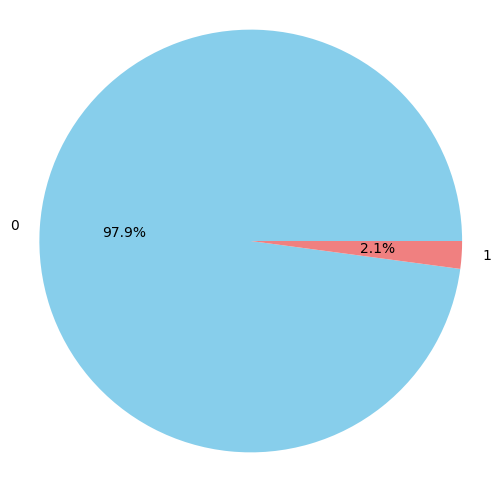

In [14]:
# Análise descritiva univariada para variáveis "dummy" usando gráficos de pizza
colunas_dummy = ['X5', 'X7', 'X11']

for coluna in colunas_dummy:
    descricao_var = descricao_variaveis[coluna]
    print(f"Análise descritiva para a variável: {descricao_var}")
    print(df[coluna].value_counts())
    plt.figure(figsize=(6, 6))
    df[coluna].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.axis('equal')
    plt.xlabel("")  # Removendo o rótulo do eixo x (não é necessário
    plt.ylabel("")  # Removendo o rótulo do eixo x (não é necessário

In [15]:
# Criando uma lista para armazenar as tabelas descritivas
tabelas_descritivas = []

colunas_nao_discretas = ['X5', 'X7', 'X11']
# Calculando as medidas descritivas para as variáveis numéricas (exceto ID)
colunas_numericas = [x for x in df.columns if x not in colunas_nao_discretas + ['X8', 'ID']]
colunas_numericas

['X1', 'X2', 'X3', 'X4', 'X6', 'X9', 'X10', 'X12', 'log_X1']

In [16]:
# Criando uma lista para armazenar as tabelas descritivas
tabelas_descritivas = []

for coluna in colunas_numericas:
    if coluna != 'ID':
        descricao_var = descricao_variaveis[coluna]
        tabela_descritiva = df[coluna].describe().reset_index()
        tabela_descritiva.columns = ['Medida Descritiva', descricao_var]
        tabelas_descritivas.append(tabela_descritiva)

for coluna in colunas_nao_discretas:
    descricao_var = descricao_variaveis[coluna]
    tabela_descritiva = df[coluna].value_counts().reset_index()
    tabela_descritiva.columns = [descricao_var, 'Contagem']
    tabelas_descritivas.append(tabela_descritiva)

# Exibindo as tabelas descritivas
for tabela_descritiva in tabelas_descritivas:
    print(tabela_descritiva)
    print()

  Medida Descritiva  Preço de venda (em dólares)
0             count                   522.000000
1              mean                277894.147510
2               std                137923.397269
3               min                 84000.000000
4               25%                180000.000000
5               50%                229900.000000
6               75%                335000.000000
7               max                920000.000000

  Medida Descritiva  Área da casa (em pés quadrados)
0             count                       522.000000
1              mean                      2260.626437
2               std                       711.065933
3               min                       980.000000
4               25%                      1701.250000
5               50%                      2061.000000
6               75%                      2636.250000
7               max                      5032.000000

  Medida Descritiva  Número de quartos na casa
0             count              

In [17]:
colunas = ['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12', 'log_X1']

nomes = []

for i in colunas:
  nomes.append(descricao_variaveis[i])

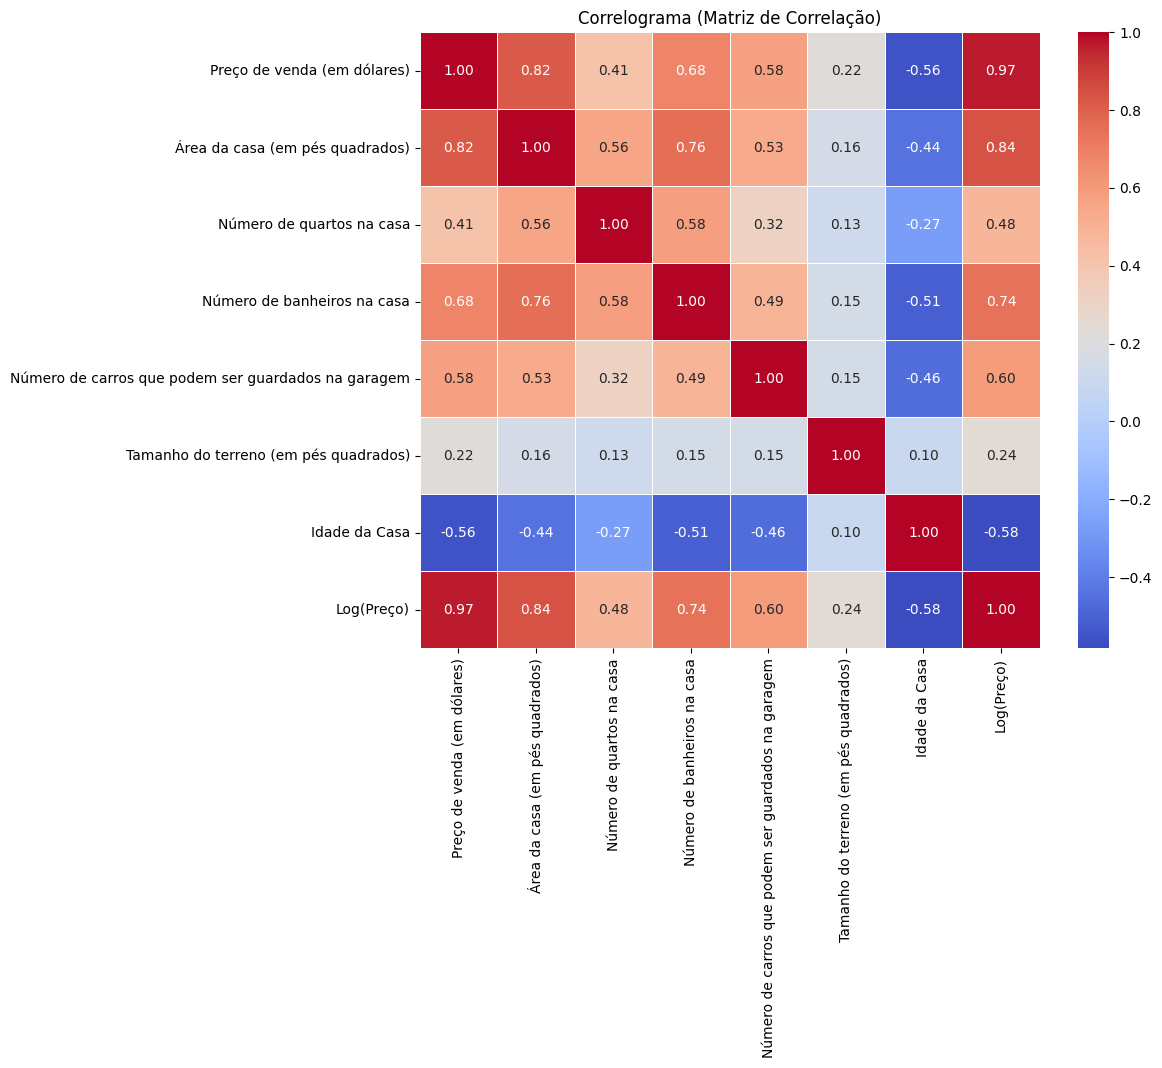

In [18]:
# Supondo que você já tenha importado os dados e o DataFrame seja chamado de 'df'
# Se você deu outro nome para o DataFrame, substitua 'df' pelo nome correto.

# Calculando a matriz de correlação
correlation_tb = df[['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12', 'log_X1']]

correlation_tb.columns = nomes

correlation_matrix = correlation_tb.corr()

# Criando o correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlograma (Matriz de Correlação)")
plt.show()

In [19]:
nomes = df[['X1', 'X5', 'X7','X9','X11']].columns

In [20]:
qualitativas = df[['X1', 'X5', 'X7','X9','X11']]

In [ ]:
qualitativas['X9'] = qualitativas['X9'].map({1: '1 - Alta qualidade', 2: '2 - Média qualidade', 3: '3 - Baixa qualidade'})

# Atualizando os labels para o eixo x dos boxplots
for coluna in ['X5', 'X7', 'X11']:
    qualitativas[coluna] = qualitativas[coluna].map({0: 'Não', 1: 'Sim'})

In [22]:
qualitativas = qualitativas.sort_values('X9')

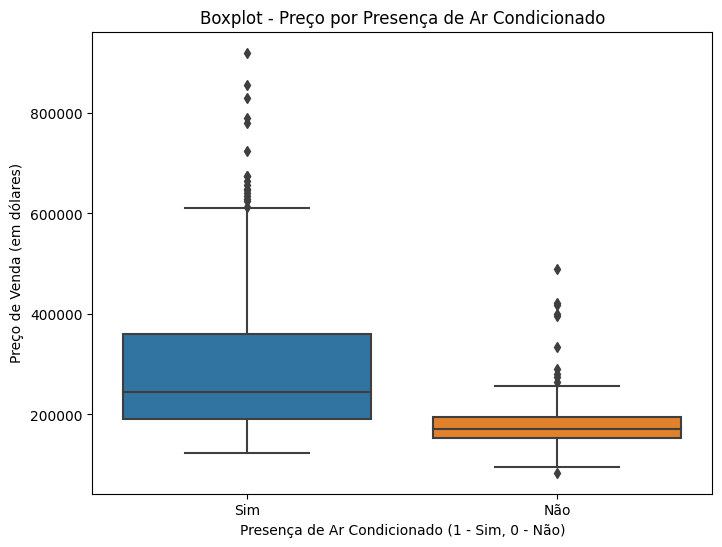

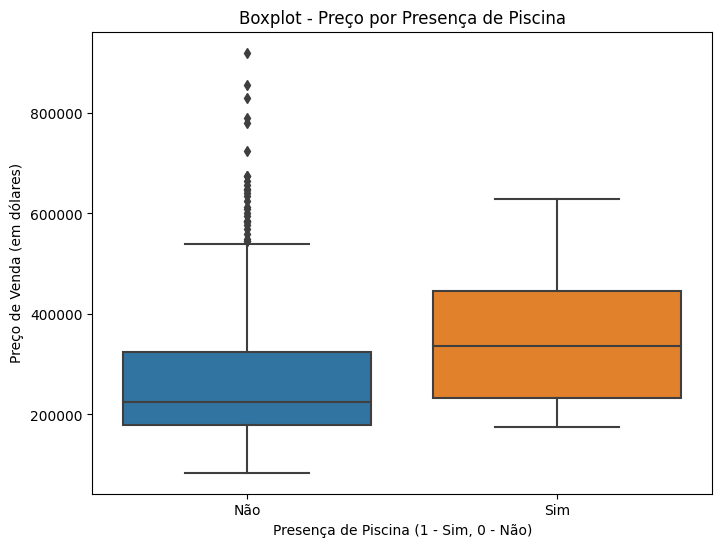

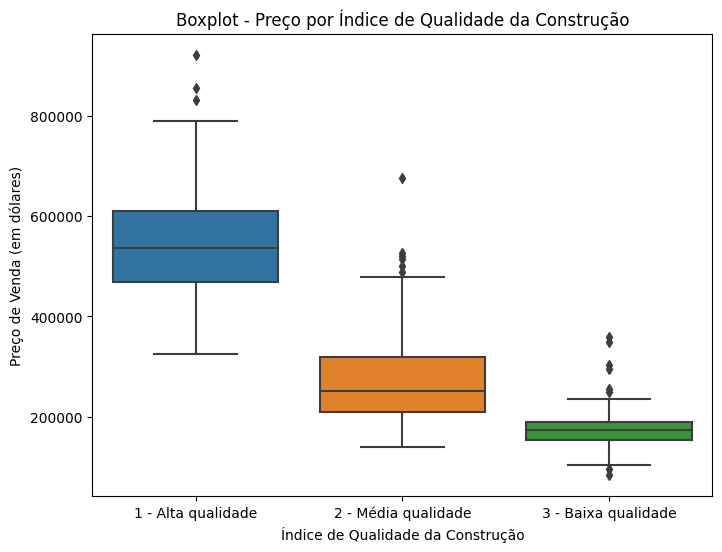

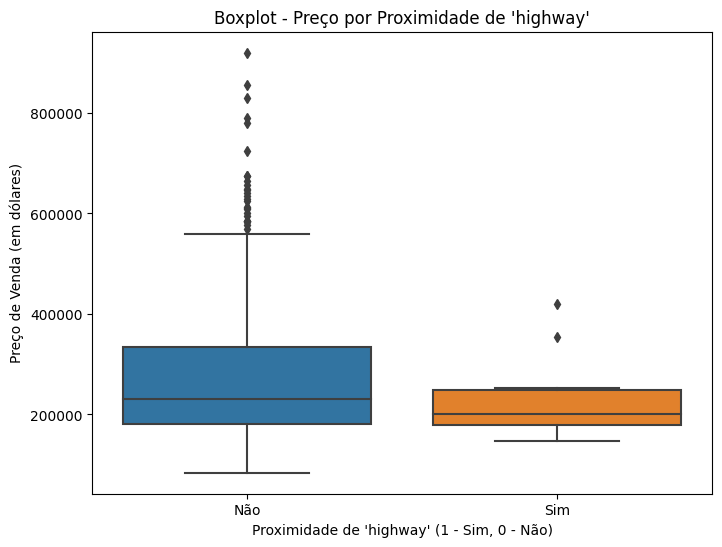

In [23]:
# Boxplot para a variável X5 (Presença de ar condicionado na casa)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X5', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Presença de Ar Condicionado")
plt.xlabel("Presença de Ar Condicionado (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X7 (Presença ou ausência de piscina)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X7', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Presença de Piscina")
plt.xlabel("Presença de Piscina (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X9 (Índice de qualidade da construção)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X9', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Índice de Qualidade da Construção")
plt.xlabel("Índice de Qualidade da Construção")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X11 (Proximidade de 'highway')
plt.figure(figsize=(8, 6))
sns.boxplot(x='X11', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Proximidade de 'highway'")
plt.xlabel("Proximidade de 'highway' (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

In [24]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# from stepwise_regression import StepwiseRegression

# Definindo a variável resposta (y) e as variáveis independentes (X)
y = df['log_X1']
X = df.drop(columns=['X1', 'log_X1', 'X8', 'ID'])  # Excluindo a coluna ID que não é relevante para a análise
X['intercept'] = 1

# Divisão da base de dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Crie o objeto StepwiseRegression e ajuste-o aos dados de treinamento
# stepwise = StepwiseRegression()
# stepwise.fit(X_train, y_train)

# # Obtenha as variáveis selecionadas
# selected_features = stepwise.get_support()

# # Imprima as variáveis selecionadas
# print("Variáveis selecionadas:")
# print(X_train.columns[selected_features])

# # Crie o modelo de regressão linear usando as variáveis selecionadas
# X_train_selected = X_train.iloc[:, selected_features]
# X_train_selected = sm.add_constant(X_train_selected)  # Adiciona a constante para o termo independente (intercepto)
# model = sm.OLS(y_train, X_train_selected).fit()

# # Imprima o resumo do modelo ajustado com as variáveis selecionadas
# print(model.summary())

In [25]:
# Fit the stepwise regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_X1   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.87e-125
Time:                        15:56:48   Log-Likelihood:                 109.71
No. Observations:                 365   AIC:                            -197.4
Df Residuals:                     354   BIC:                            -154.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.0003   2.44e-05     11.816      0.0

In [26]:
# Função para realizar a seleção de variáveis forward stepwise
def forward_stepwise_selection(X, y, threshold_in=0.01, verbose=True):
    included = []
    while True:
        changed = False
        # Etapa 1: Adicionar variáveis ao modelo
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Adicionando {best_feature} (p-value: {best_pval:.4f})")
        if not changed:
            break
    return included

In [27]:
selected_features = forward_stepwise_selection(X_train, y_train)

<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-26-5d70b8505083>:8: FutureWarning: The defaul

Adicionando intercept (p-value: 0.0000)
Adicionando X2 (p-value: 0.0000)
Adicionando X9 (p-value: 0.0000)
Adicionando X10 (p-value: 0.0000)
Adicionando X12 (p-value: 0.0000)
Adicionando X6 (p-value: 0.0090)


<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-26-5d70b8505083>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [28]:
selected_features

['intercept', 'X2', 'X9', 'X10', 'X12', 'X6']

In [29]:
# Fit the stepwise regression model
model = sm.OLS(y_train, X_train[selected_features]).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_X1   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     310.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          6.53e-128
Time:                        15:57:00   Log-Likelihood:                 102.53
No. Observations:                 365   AIC:                            -193.1
Df Residuals:                     359   BIC:                            -169.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.0239      0.094    127.734      0.0

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que você já tenha importado os dados e o DataFrame seja chamado de 'df'
# Se você deu outro nome para o DataFrame, substitua 'df' pelo nome correto.
# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

In [31]:
# Criando a coluna "Idade da Casa"
dfmodelo = df[[x for x in selected_features if x != 'intercept']]

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X2  13.847129
1       X9  16.925851
2      X10   5.848921
3      X12  18.943867
4       X6  14.466193


In [32]:
selected_features

['intercept', 'X2', 'X9', 'X10', 'X12', 'X6']

In [33]:
selected_features = ['intercept', 'X2', 'X9', 'X10', 'X6']

In [34]:
# Criando a coluna "Idade da Casa"
dfmodelo = df[[x for x in selected_features if x != 'intercept']]

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X2  13.334423
1       X9   4.775854
2      X10   5.426226
3       X6  14.209092


In [35]:
selected_features = ['intercept', 'X2', 'X9', 'X10']

In [36]:
# Criando a coluna "Idade da Casa"
dfmodelo = df[[x for x in selected_features if x != 'intercept']]

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável       VIF
0       X2  5.473756
1       X9  4.457278
2      X10  5.289488


In [37]:
selected_features = ['X2', 'X9', 'X10', 'intercept']

In [38]:
# Fit the stepwise regression model
model = sm.OLS(y_train, X_train[selected_features]).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_X1   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     457.5
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.37e-122
Time:                        15:57:59   Log-Likelihood:                 83.797
No. Observations:                 365   AIC:                            -159.6
Df Residuals:                     361   BIC:                            -144.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.0003   2.05e-05     16.665      0.0

In [39]:
import numpy as np

# Função para calcular o MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Função para calcular o MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Definir as variáveis alvo (y) para treino e teste
y_train_pred = model.predict(X_train[selected_features])
y_test_pred = model.predict(X_test[selected_features])

# Calcular o MSE e o MAPE para as bases de treino
mse_train = calculate_mse(y_train, y_train_pred)
mape_train = calculate_mape(y_train, y_train_pred)

# Calcular o MSE e o MAPE para as bases de teste
mse_test = calculate_mse(y_test, y_test_pred)
mape_test = calculate_mape(y_test, y_test_pred)

# Calcular o R² para as bases de treino e teste
r_squared_train = model.rsquared
r_squared_test = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Imprimir os resultados
print(f"MSE (Treino): {mse_train:.2f}")
print(f"MAPE (Treino): {mape_train:.2f}%")
print(f"R² (Treino): {r_squared_train:.4f}")
print(f"MSE (Teste): {mse_test:.2f}")
print(f"MAPE (Teste): {mape_test:.2f}%")
print(f"R² (Teste): {r_squared_test:.4f}")

MSE (Treino): 0.04
MAPE (Treino): 1.20%
R² (Treino): 0.7917
MSE (Teste): 0.04
MAPE (Teste): 1.28%
R² (Teste): 0.8020


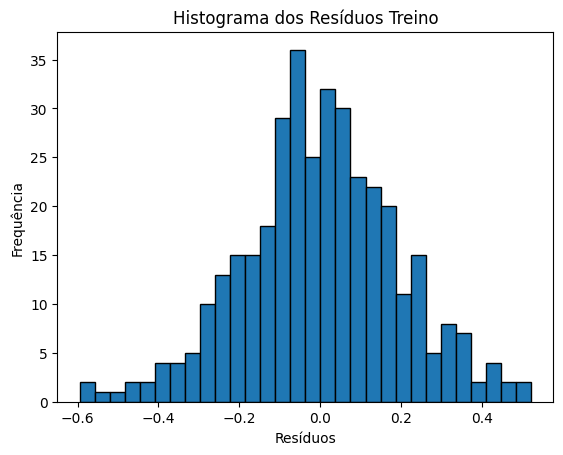

In [40]:
import matplotlib.pyplot as plt

# Calculando os resíduos
residuos_train = y_train - y_train_pred

# Plotando o histograma dos resíduos
plt.hist(residuos_train, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos Treino')
plt.show()

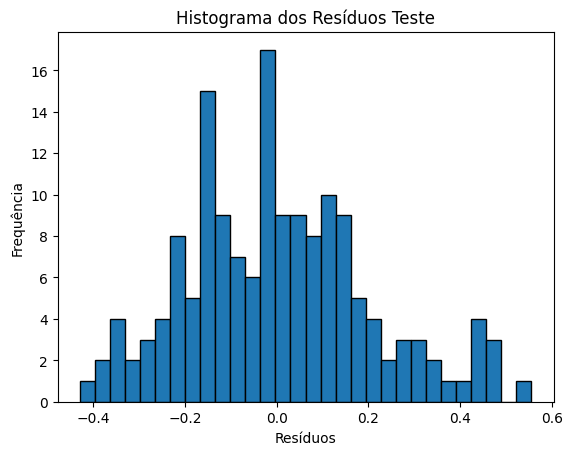

In [41]:
import matplotlib.pyplot as plt

# Calculando os resíduos
residuos_test = y_test - y_test_pred

# Plotando o histograma dos resíduos
plt.hist(residuos_test, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos Teste')
plt.show()

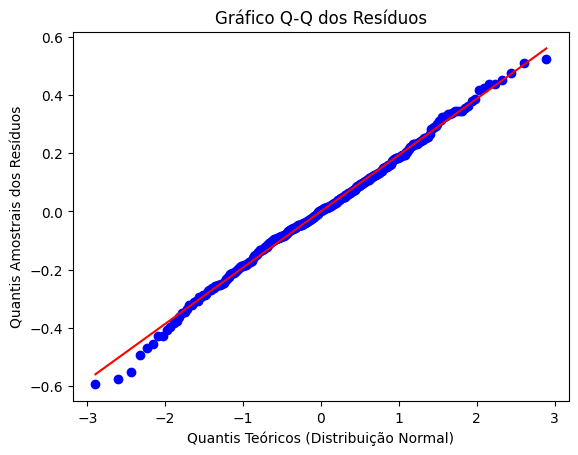

In [42]:
from scipy.stats import probplot

# Crie o gráfico Q-Q
probplot(residuos_train, plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.xlabel("Quantis Teóricos (Distribuição Normal)")
plt.ylabel("Quantis Amostrais dos Resíduos")
plt.show()

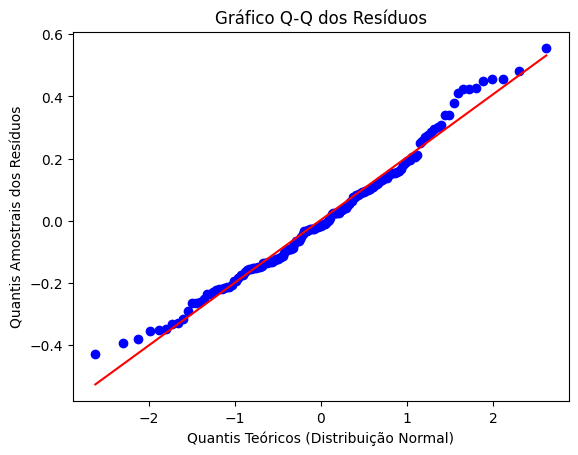

In [43]:
from scipy.stats import probplot

# Crie o gráfico Q-Q
probplot(residuos_test, plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.xlabel("Quantis Teóricos (Distribuição Normal)")
plt.ylabel("Quantis Amostrais dos Resíduos")
plt.show()

In [44]:
from scipy.stats import shapiro

# Realizar o teste de Shapiro-Wilk nos resíduos
statistic, p_value = shapiro(residuos_train)

# Imprimir os resultados do teste de normalidade
print(f"Estatística do teste: {statistic:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretar o resultado do teste de normalidade
alpha = 0.05
if p_value > alpha:
    print("Os resíduos seguem uma distribuição normal (não podemos rejeitar a hipótese nula).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).")

Estatística do teste: 0.9961
Valor-p: 0.5037
Os resíduos seguem uma distribuição normal (não podemos rejeitar a hipótese nula).


In [45]:
# Calcular os resíduos
residuos = y_test - y_test_pred

# Realizar o teste de Shapiro-Wilk nos resíduos
statistic, p_value = shapiro(residuos_test)

# Imprimir os resultados do teste de normalidade
print(f"Estatística do teste: {statistic:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretar o resultado do teste de normalidade
alpha = 0.05
if p_value > alpha:
    print("Os resíduos seguem uma distribuição normal (não podemos rejeitar a hipótese nula).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).")

Estatística do teste: 0.9831
Valor-p: 0.0513
Os resíduos seguem uma distribuição normal (não podemos rejeitar a hipótese nula).


In [53]:
model.params

X2            0.000342
X9           -0.241849
X10           0.000005
intercept    12.070208
dtype: float64

In [63]:
nomes = list(model.params.index)

In [51]:
parametros = list(model.params)

In [74]:
parametros

[0.00034158553902670195,
 -0.24184871789170623,
 4.9135417467871935e-06,
 12.070207696247865]

In [75]:
coeficientes_exp = [np.exp(coef) for coef in parametros]

In [76]:
coeficientes_exp

[1.0003416438860102,
 0.7851749514894579,
 1.0000049135538183,
 174592.10369455646]

In [78]:
base = coeficientes_exp[3]

In [84]:
aditivo = []

for i in coeficientes_exp:
  adi = (i - 1) * base
  aditivo.append(adi)

aditivo = aditivo[:3]
aditivo

[59.6483247729062, -37506.75714574068, 0.8578676977471853]

In [92]:
for x, y in zip(nomes, aditivo):
  if x == 'intercept':
    None
  else:
    if y > 0:
      teste = 'um aumento'
    else:
      teste = 'uma redução'
    y_formatado = "{:6.4f}".format(y)

    print(f'A cada unidade de "{descricao_variaveis[x]}" há {teste} de R${str(y_formatado)} no preço do imóvel')

A cada unidade de "Área da casa (em pés quadrados)" há um aumento de R$59.6483 no preço do imóvel
A cada unidade de "Índice de qualidade da construção" há uma redução de R$-37506.7571 no preço do imóvel
A cada unidade de "Tamanho do terreno (em pés quadrados)" há um aumento de R$0.8579 no preço do imóvel
